In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)
df.head(5)

,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
0,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:19Z,1.0,-31.8027,...,9.0,0.2722,4.0,0.3541,4.0,0.0712,4.0,0.0114,4.0,POINT (114.98013440372972 -31.802694506260686)
1,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:22Z,1.0,-31.8027,...,9.0,0.2642,4.0,0.3463,4.0,0.0675,4.0,0.0133,4.0,POINT (114.98013265657173 -31.802693721740056)
2,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:23Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3398,4.0,0.0675,4.0,0.0128,4.0,POINT (114.98013155928385 -31.802693229028474)
3,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:26Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0666,4.0,0.0104,4.0,POINT (114.98012962223838 -31.802692359243295)
4,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:28Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0634,4.0,0.0104,4.0,POINT (114.9801285199303 -31.802691864277513)


In [2]:
df = df.drop(df[(df.PSAL < 2)].index)
df = df.drop(df[(df.PSAL > 41)].index)
#len(df)
df = df.drop(df[(df.CPHL < 0)].index)
df = df.drop(df[(df.CPHL > 100)].index)
#len(df)
df = df.drop(df[(df.CDOM < 0)].index)
df = df.drop(df[(df.CDOM > 400)].index)
#len(df)
df = df.drop(df[(df.VBSC < 0)].index)
df = df.drop(df[(df.VBSC > 0.1)].index)
#len(df)
df = df.drop(df[(df.IRRAD555 < 0) ].index)
df = df.drop(df[(df.IRRAD555 > 1000)].index)
len(df)

3101188

In [3]:
name=df.deployment_name.unique()
print(name)

['TwoRocks20130215' 'Leeuwin20131017' 'AIMS20151127'
 'LizardIsland20131024' 'SpencerGulf20131031' 'TwoRocks20140808'
 'StormBay20141017']


In [4]:
#table without quality_control
df_wiz= df[['file_id','deployment_name','platform_code','time_coverage_start','time_coverage_end','LATITUDE', 'LONGITUDE','PRES','DEPTH','PROFILE','PHASE','TEMP','PSAL','DOX1','DOX2','CPHL','CDOM','CNDC','VBSC','NTRA','UCUR','VCUR','HEAD','UCUR_GPS','VCUR_GPS','IRRAD443','IRRAD490','IRRAD555','IRRAD670','geom']]
df_wiz.isnull().sum()

file_id                      0
deployment_name              0
platform_code                1
time_coverage_start          1
time_coverage_end            1
LATITUDE                  2077
LONGITUDE                 2077
PRES                      6895
DEPTH                     7687
PROFILE                   1556
PHASE                     7049
TEMP                      1410
PSAL                      7252
DOX1                    641383
DOX2                    770651
CPHL                    877544
CDOM                    877545
CNDC                      1786
VBSC                    877544
NTRA                   2861977
UCUR                   3100081
VCUR                   3100081
HEAD                      3843
UCUR_GPS               3099715
VCUR_GPS               3099715
IRRAD443               1514766
IRRAD490               1514766
IRRAD555               1514766
IRRAD670               1514766
geom                      2077
dtype: int64

In [5]:
#platform_code
a=df_wiz.platform_code.unique()
print(a)
plat_num = df_wiz.platform_code.nunique()
print ("The unique non-null number of platform_code is",plat_num)

['SL248' 'SG152' 'SL416' 'SG155' 'SL287' 'SL281' 'SL286' nan]
The unique non-null number of platform_code is 7


In [6]:
#time diff
st=pd.to_datetime(df.time_coverage_start)
end=pd.to_datetime(df.time_coverage_end)
print(st.unique())
print(end.unique())
print((end-st).dt.days.unique())
start_num = st.nunique()
print ("The unique not-null number of start time is",start_num)

['2013-02-15T03:13:29.000000000' '2013-10-17T03:24:57.000000000'
 '2015-11-26T03:51:30.000000000' '2013-10-24T00:55:30.000000000'
 '2013-10-31T01:16:21.000000000' '2014-08-08T02:48:06.000000000'
 '2014-10-17T00:40:46.000000000'                           'NaT']
['2013-03-11T20:14:20.000000000' '2014-01-06T23:07:23.000000000'
 '2015-12-15T23:12:33.000000000' '2013-12-17T00:40:31.000000000'
 '2013-11-13T05:44:04.000000000' '2014-08-24T22:39:08.000000000'
 '2014-11-06T22:18:12.000000000'                           'NaT']
[24. 81. 19. 53. 13. 16. 20. nan]
The unique not-null number of start time is 7


In [7]:
#df[df.UCUR.notnull()]
#detect the correlation of platform_code and the missing value of UCUR
UR=df_wiz[df_wiz.UCUR.isnull()].groupby('platform_code')
print(UR.platform_code.unique())
ur_pper=UR.platform_code.unique().count()/plat_num*100
print("the percentage of missing value of UCUR that among the different types of platform_code",ur_pper)

platform_code
SG152    [SG152]
SG155    [SG155]
SL248    [SL248]
SL281    [SL281]
SL286    [SL286]
SL287    [SL287]
SL416    [SL416]
Name: platform_code, dtype: object
the percentage of missing value of UCUR that among the different types of platform_code 100.0


In [8]:
#detect the correlation of time and the missing value of UCUR
time_ur=df_wiz[df_wiz.UCUR.isnull()].groupby('time_coverage_start')
time_ur.platform_code.unique()
print("the percentage of missing value of UCUR that among the different slots of time",time_ur.platform_code.unique().count()/start_num*100)

the percentage of missing value of UCUR that among the different slots of time 100.0


In [9]:
#detect the correlation of platform_code and the missing value of NTRA
NA=df_wiz[df_wiz.NTRA.isnull()].groupby('platform_code')
print(NA.platform_code.unique())
print("the percentage of missing value of NTRA that among the different types of platform_code",round(NA.platform_code.unique().count()/plat_num*100))

platform_code
SG152    [SG152]
SG155    [SG155]
SL248    [SL248]
SL281    [SL281]
SL286    [SL286]
SL287    [SL287]
Name: platform_code, dtype: object
the percentage of missing value of NTRA that among the different types of platform_code 86.0


In [10]:
#detect the correlation of time and the missing value of NTRA
time_na=df_wiz[df_wiz.NTRA.isnull()].groupby('time_coverage_start')
print(time_na.platform_code.unique())
print("the percentage of missing value of NTRA that among the different slots of time",round(time_na.platform_code.unique().count()/start_num*100))

time_coverage_start
2013-02-15T03:13:29Z    [SL248]
2013-10-17T03:24:57Z    [SG152]
2013-10-24T00:55:30Z    [SG155]
2013-10-31T01:16:21Z    [SL287]
2014-08-08T02:48:06Z    [SL281]
2014-10-17T00:40:46Z    [SL286]
Name: platform_code, dtype: object
the percentage of missing value of NTRA that among the different slots of time 86.0


In [11]:
#detect the correlation of platform_code and the missing value of VCUR
VR=df_wiz[df_wiz.VCUR.isnull()].groupby('platform_code')
print(VR.platform_code.unique())
print("the percentage of missing value of VCUR that among the different types of platform_code",round(VR.platform_code.unique().count()/plat_num*100))

platform_code
SG152    [SG152]
SG155    [SG155]
SL248    [SL248]
SL281    [SL281]
SL286    [SL286]
SL287    [SL287]
SL416    [SL416]
Name: platform_code, dtype: object
the percentage of missing value of VCUR that among the different types of platform_code 100.0


In [12]:
#detect the correlation of time and the missing value of VCUR
time_vr=df_wiz[df_wiz.VCUR.isnull()].groupby('time_coverage_start')
print(time_vr.platform_code.unique())
print("the percentage of missing value of VCUR that among the different slots of time",round(time_vr.platform_code.unique().count()/start_num*100))

time_coverage_start
2013-02-15T03:13:29Z    [SL248]
2013-10-17T03:24:57Z    [SG152]
2013-10-24T00:55:30Z    [SG155]
2013-10-31T01:16:21Z    [SL287]
2014-08-08T02:48:06Z    [SL281]
2014-10-17T00:40:46Z    [SL286]
2015-11-26T03:51:30Z    [SL416]
Name: platform_code, dtype: object
the percentage of missing value of VCUR that among the different slots of time 100.0


In [14]:
#delete invalid columns VCUR,UCUR and NTRA
AI_15 = df[df['deployment_name'] == 'AIMS20151127']
del AI_15['NTRA']
del AI_15['UCUR']
del AI_15['VCUR']
#find the unique value in PSAL_quality_control
psalQ = AI_15.PSAL_quality_control.unique()
print(psalQ)
#keep good data only
psalValid=AI_15.loc[df['PSAL_quality_control'] == 1.]
AI_15.head(5)

[0. 1. 3. 9.]


,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
996390,anfog_dm_trajectory_data.fid-7f408395_174917fa...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-11-26T03:51:31Z,4.0,-18.4511,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.95254500000001 -18.451075)
996391,anfog_dm_trajectory_data.fid-7f408395_174917fa...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-11-26T03:51:37Z,4.0,-18.4511,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.95253 -18.451083333333333)
996392,anfog_dm_trajectory_data.fid-7f408395_174917fa...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-11-26T03:51:43Z,4.0,-18.4511,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.952525 -18.451075)
996393,anfog_dm_trajectory_data.fid-7f408395_174917fa...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-11-26T03:51:49Z,4.0,-18.4511,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.95254500000001 -18.451083333333333)
996394,anfog_dm_trajectory_data.fid-7f408395_174917fa...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-11-26T03:51:55Z,4.0,-18.4511,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.95256166666667 -18.451116666666667)


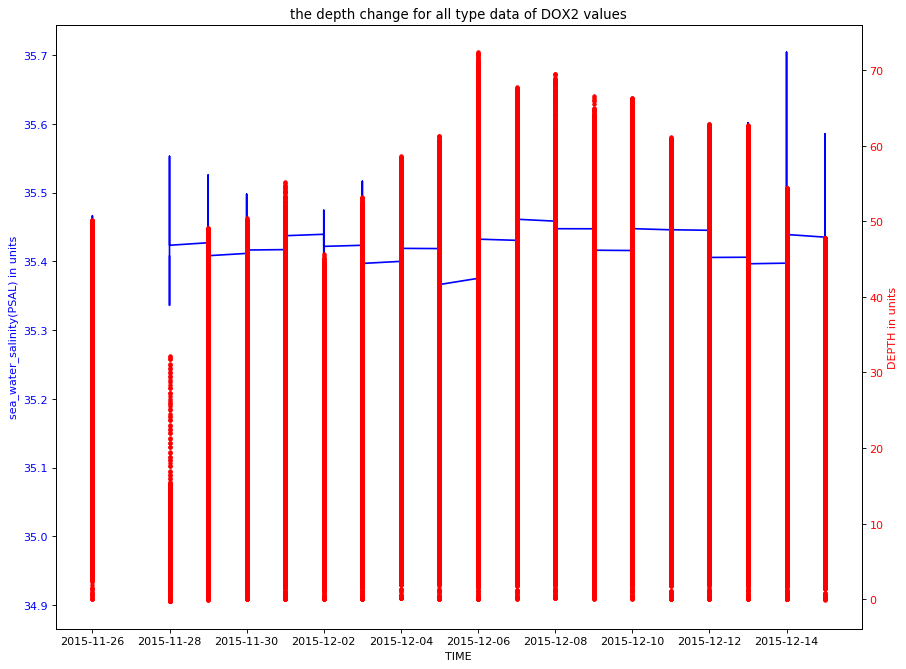

In [17]:
from numpy import where
from netCDF4 import Dataset, num2date
from matplotlib.pyplot import figure, xlabel, ylabel, title, show

# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(AI_15['TIME']).dt.date.values
psalData = AI_15['PSAL'].values
depthData = AI_15['DEPTH'].values
# plot depth and salinity(psal) timeseries
figure1 = figure( figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.set_title('the depth change for all type data of DOX2 values')
ax1.plot(TIME,psalData, 'b-')
ax1.set_xlabel('TIME')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('sea_water_salinity(PSAL)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

show()

In [18]:
#detective the not good of PSAL
#it turns out that there are only two items is missing value,so we decide to delete it
psalMissing=AI_15.loc[df['PSAL_quality_control'] == 9.]
print("the num of missing psal for PSAL is",len(psalMissing))

the num of missing psal for PSAL is 27


In [22]:
### ------ update AI_15 ---------#####
####not include missing PSAL in our dataset (only kept those != 9)
AI_15 =AI_15[(AI_15['PSAL_quality_control'] != 9.)]
psalInvalid = AI_15.loc[df['PSAL_quality_control'] != 1.]
#the ratio is extremely small which means that we can ignore the invalid data 
#we only focous on those that whose psal_quality_control is 1
print("the ratio of bad quality(including missing)data v.s.good quality is",round(len(psalInvalid)/len(psalValid),3))

the ratio of bad quality(including missing)data v.s.good quality is 0.021


In [25]:
#update the AI_15 with psal good quality data only
AI_15 = psalValid

#####then I will do the features selection one by one

#PROFILE:glider_trajectory_profile_number
proQ = AI_15.PROFILE_quality_control.unique()
print("the type of profile quality control is:",proQ) 
#We will leave the type 0: No QC performed still there
#then checking the pecentage of missing data
pro_missing=AI_15.loc[df['PROFILE_quality_control'] == 9.]
print('the number of missing data for profile',len(pro_missing),', and the pecentage is',round(len(pro_missing)/len(AI_15),4)*100,'%')
#there are only 4 missing of profile
# we wont include it in the data set 

### ------ update AI_15 ---------#####
AI_15 =AI_15[(AI_15['PROFILE_quality_control'] != 9.)]

the type of profile quality control is: [0. 9.]
the number of missing data for profile 4 , and the pecentage is 0.0 %


In [29]:
#DOX2:standard_name: moles_of_oxygen_per_unit_mass_in_sea_water
do2 = AI_15.DOX2_quality_control.unique()
print('the quality type of DOX2 are',do2)
do2bad_p=AI_15.loc[df['DOX2_quality_control'] == 3.]
print('the number of bad data that are potential correctable for DOX2',len(do2bad_p),', and the pecentage is',round(len(do2bad_p)/len(AI_15),2)*100,'%')

####since the number of Bad data that are potentially correctable is not very huge but still exists 
####the probability the is correct
#### therefore, we will keep it.
#### no need to change DOX2

the quality type of DOX2 are [3. 1.]
the number of bad data that are potential correctable for DOX2 170 , and the pecentage is 0.0 %


In [30]:
#do similar for VBSC  
#VBSC: quality control flag for volume_scattering_function
vbQ = AI_15.VBSC_quality_control.unique() 
print('the unique quality control type for VBSC is:', vbQ)
##only good data
#------ No need to change for VBSC-----#
#irrade 45% bad
#quality control flag for downwelling_spectral_irradiance_in_sea_water_beam1


the unique quality control type for VBSC is: [1.]


In [35]:
#irrade 45% bad
#quality control flag for downwelling_spectral_irradiance_in_sea_water_beam1
ir4Q = AI_15.IRRAD443_quality_control.unique()
print('type of IRRAD443 is:',ir4Q) 
ir9Q = AI_15.IRRAD490_quality_control.unique()
print('type of IRRAD490',ir9Q) 
ir5Q = AI_15.IRRAD555_quality_control.unique()
print('type of IRRAD555',ir5Q) 
ir6Q = AI_15.IRRAD670_quality_control.unique()
print('type of IRRAD670',ir6Q) 

type of IRRAD443 is: [nan]
type of IRRAD490 [nan]
type of IRRAD555 [nan]
type of IRRAD670 [nan]


In [36]:
#all the irrad is nan,so we delete everything
del AI_15['IRRAD443']
del AI_15['IRRAD490']
del AI_15['IRRAD555']
del AI_15['IRRAD670']

In [37]:
del AI_15['NTRA_quality_control']
del AI_15['UCUR_quality_control']
del AI_15['VCUR_quality_control']
#UCUR can only be calculated when the glider is close to the surface and gets an updated GPS fix
#THus UCUR_GPSand VCUR_GPS null value can be deleted

del AI_15['UCUR_GPS']
del AI_15['UCUR_GPS_quality_control']
del AI_15['VCUR_GPS']
del AI_15['VCUR_GPS_quality_control']
print(AI_15.isnull().sum())

FID                               0
file_id                           0
deployment_name                   0
platform_type                     0
platform_code                     0
time_coverage_start               0
time_coverage_end                 0
TIME                              0
TIME_quality_control              0
LATITUDE                       1677
LATITUDE_quality_control          0
LONGITUDE                      1677
LONGITUDE_quality_control         0
PRES                              0
PRES_quality_control              0
DEPTH                             0
DEPTH_quality_control             0
PROFILE                           0
PROFILE_quality_control           0
PHASE                             0
PHASE_quality_control             0
TEMP                              0
TEMP_quality_control              0
PSAL                              0
PSAL_quality_control              0
DOX1                              0
DOX1_quality_control              0
DOX2                        

In [39]:
del AI_15['IRRAD443_quality_control']
del AI_15['IRRAD490_quality_control']
del AI_15['IRRAD555_quality_control']
del AI_15['IRRAD670_quality_control']

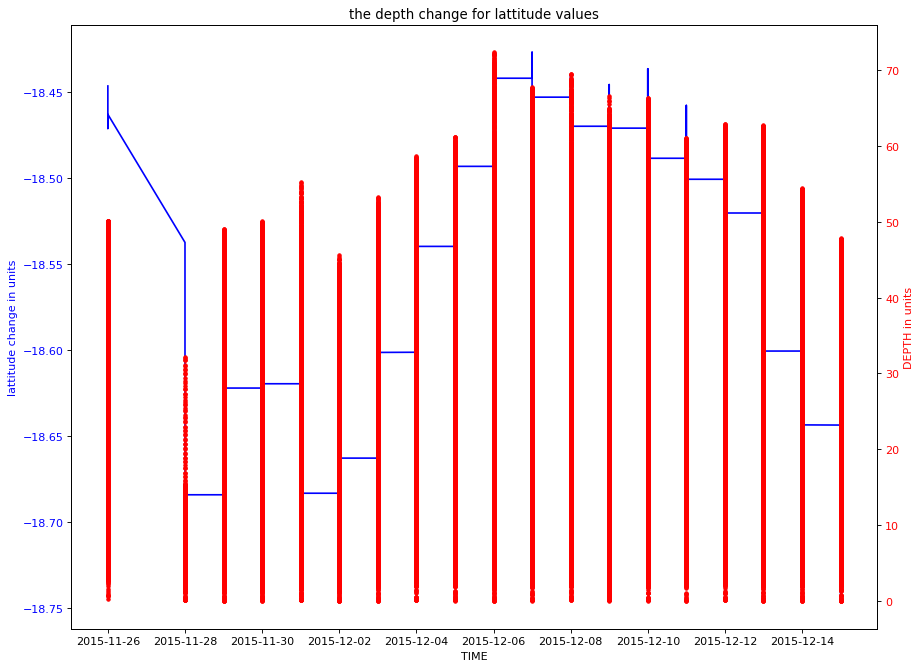

In [41]:
##there are several lattitude and longtitude are missing
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(AI_15['TIME']).dt.date.values
AI_la= AI_15['LATITUDE'].values
depthData = AI_15['DEPTH'].values

# plot depth and DOX2 missing value timeseries
figure2 = figure( figsize=(13,10 ), dpi=80, facecolor='w', edgecolor='k')

ax2 = figure2.add_subplot(111)
ax2.plot(TIME,AI_la, 'b-')
ax2.set_xlabel('TIME')
ax2.set_title('the depth change for lattitude values')
# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('lattitude change' + ' in units', color='b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')

ax3 = ax2.twinx()
ax3.plot(TIME,depthData, 'r.')
ax3.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax3.get_yticklabels():
    tl.set_color('r')
    
show()


In [53]:
#plot diagram for lattitude missing data
la_type = AI_15.LATITUDE.unique()
print('the unique type of lattitude is', la_type)
AI_la_missing = AI_15[AI_15['LATITUDE'].isnull()]
AI_la_missing.head(5)

the unique type of lattitude is [-18.4467 -18.447  -18.4474 ... -18.7457 -18.7461      nan]


,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,CPHL_quality_control,CDOM,CDOM_quality_control,CNDC,CNDC_quality_control,VBSC,VBSC_quality_control,HEAD,HEAD_quality_control,geom
1235864,anfog_dm_trajectory_data.fid-7f408395_174917fe...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-12-15T20:21:11Z,1.0,NaN,...,1.0,0.1314,1.0,5.6946,1.0,0.0004,1.0,83.6003,0.0,NaN
1235865,anfog_dm_trajectory_data.fid-7f408395_174917fe...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-12-15T20:21:17Z,1.0,NaN,...,1.0,0.8671,1.0,5.6945,1.0,0.0001,1.0,87.6001,0.0,NaN
1235866,anfog_dm_trajectory_data.fid-7f408395_174917fe...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-12-15T20:21:23Z,1.0,NaN,...,1.0,0.6335,1.0,5.6945,1.0,0.0001,1.0,96.2002,0.0,NaN
1235867,anfog_dm_trajectory_data.fid-7f408395_174917fe...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-12-15T20:21:29Z,1.0,NaN,...,1.0,0.6727,1.0,5.6944,1.0,0.0001,1.0,115.9002,0.0,NaN
1235868,anfog_dm_trajectory_data.fid-7f408395_174917fe...,186,AIMS20151127,slocum glider,SL416,2015-11-26T03:51:30Z,2015-12-15T23:12:33Z,2015-12-15T20:21:35Z,1.0,NaN,...,1.0,0.5453,1.0,5.6946,1.0,0.0001,1.0,124.5003,0.0,NaN


In [55]:
print('the pecentage of lattitude mimssing is',round(len(AI_la_missing)/len(AI_15),2)*100,'%')

the pecentage of lattitude mimssing is 1.0 %


In [67]:
#exclude the missing lattitude 
AI_15 =AI_15[AI_15['LATITUDE'].notnull()]
#find the missing for head
#quality control flag for vehicle_heading
la_type = AI_15.HEAD.unique()
AI_head_missing = AI_15[AI_15['HEAD'].isnull()]
print('the unique type of head is:',la_type)
print('the pecentage of jead mimssing is',round(len(AI_head_missing)/len(AI_15),2)*100,'%')
## ---- delete the missing----#
AI_15 = AI_15[AI_15['HEAD'].notnull()]

the unique type of head is: [ 73.3002  75.2001  58.3002 ... 120.0003 122.1999 136.9002]
the pecentage of jead mimssing is 0.0 %


In [68]:
print(AI_15.isnull().sum())

FID                          0
file_id                      0
deployment_name              0
platform_type                0
platform_code                0
time_coverage_start          0
time_coverage_end            0
TIME                         0
TIME_quality_control         0
LATITUDE                     0
LATITUDE_quality_control     0
LONGITUDE                    0
LONGITUDE_quality_control    0
PRES                         0
PRES_quality_control         0
DEPTH                        0
DEPTH_quality_control        0
PROFILE                      0
PROFILE_quality_control      0
PHASE                        0
PHASE_quality_control        0
TEMP                         0
TEMP_quality_control         0
PSAL                         0
PSAL_quality_control         0
DOX1                         0
DOX1_quality_control         0
DOX2                         0
DOX2_quality_control         0
CPHL                         0
CPHL_quality_control         0
CDOM                         0
CDOM_qua

In [71]:
print(AI_15.isnull().sum())
#there is no missing values 

#----------'TwoRocks20140808'---------  output the rawdata as CSV
AI_15.to_csv (r'C:\Users\xinyu\Desktop\data\AIMS20151127.csv', index = False, header=True)

FID                          0
file_id                      0
deployment_name              0
platform_type                0
platform_code                0
time_coverage_start          0
time_coverage_end            0
TIME                         0
TIME_quality_control         0
LATITUDE                     0
LATITUDE_quality_control     0
LONGITUDE                    0
LONGITUDE_quality_control    0
PRES                         0
PRES_quality_control         0
DEPTH                        0
DEPTH_quality_control        0
PROFILE                      0
PROFILE_quality_control      0
PHASE                        0
PHASE_quality_control        0
TEMP                         0
TEMP_quality_control         0
PSAL                         0
PSAL_quality_control         0
DOX1                         0
DOX1_quality_control         0
DOX2                         0
DOX2_quality_control         0
CPHL                         0
CPHL_quality_control         0
CDOM                         0
CDOM_qua